In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1
1,0.882490,-0.075756,0
2,-0.055144,-0.037332,1
3,0.829545,-0.539321,1
4,2.112857,0.662084,1


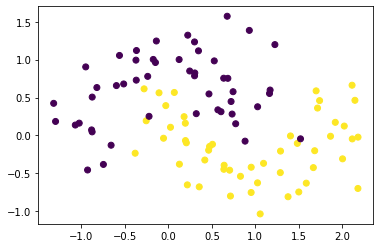

In [4]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras 
from keras import Sequential 
from keras.layers import Dense

2024-10-09 19:32:32.265243: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 19:32:32.291980: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 19:32:32.300232: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 19:32:32.320631: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-09 19:32:34.085832: W tensorflow/compiler/tf2

In [8]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[-0.94812703, -0.40415344,  1.1677278 ,  1.2783589 , -0.01479625,
         -0.4254205 ,  0.93457913,  1.0644308 ,  0.2963426 , -0.700573  ],
        [ 0.2899575 ,  1.2894279 , -0.61114347, -0.22030643,  1.3296127 ,
          1.8732303 , -0.4775851 , -0.3761809 ,  0.31504285,  0.4591201 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.3970288 , -0.6534053 ,  0.11381703,  0.2317399 ,  0.01248342,
         -0.2962383 , -0.5231221 ,  0.04355262, -0.24624917,  0.65886813],
        [ 0.509757  ,  0.10169671,  0.23092292,  0.19639419,  0.1639067 ,
         -0.2912841 , -0.2387858 ,  0.9178374 ,  0.25245813,  0.09968515],
        [-0.79569995,  0.01034698, -0.31541973,  0.7212561 ,  0.31425282,
          0.13459751,  0.01453716, -0.09438168, -0.12863055, -0.4026268 ],
        [-0.35408455,  0.70098203, -0.05141579, -0.4265638 ,  0.21718496,
          0.26848873,  0.15219256, -0.07865278, -0.02989432, -0.48167625],
        [-0.06343

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[-3.0322422e-04,  8.8112319e-01, -4.0295628e-01, -1.0604736e+00,
         -6.2727392e-01, -3.7787160e-01, -8.6969751e-01,  3.1121773e-01,
          2.8318352e-01,  1.5665875e-01],
        [ 1.5980784e+00,  1.2272022e+00,  2.8316388e-01, -8.4227103e-01,
         -2.6897600e-01, -1.1650691e+00, -2.9002130e-01, -4.1027007e-01,
          4.8492560e-01,  5.2988273e-01]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-3.9250389e-02,  5.6253515e-02, -4.1640756e-01, -5.1352280e-01,
         -2.6988292e-01,  7.2895072e-02, -2.3679604e-01, -8.8029191e-02,
         -2.1867274e-01, -6.6239484e-02],
        [ 1.6032596e-01,  4.5894739e-01,  1.2060520e-01, -4.8806769e-01,
         -2.7027965e-01,  9.9243186e-02,  3.1181085e-01,  2.1039699e-01,
          1.2601453e-01, -3.8231313e-01],
        [ 5.9522879e-01,  1.2828687e-01,  5.7618219e-01,  6.4721137e-01,
          2.4230278e-01, -4.4900969e-01,  4.6171594e-01,  5.5060190e-01,
          2.3454228e

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X,y,epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.4954 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6844
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5149 - loss: 0.6860 - val_accuracy: 0.4500 - val_loss: 0.6795
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5134 - loss: 0.6828 - val_accuracy: 0.4500 - val_loss: 0.6748
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4885 - loss: 0.6794 - val_accuracy: 0.5000 - val_loss: 0.6700
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5495 - loss: 0.6743 - val_accuracy: 0.5000 - val_loss: 0.6654
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5149 - loss: 0.6639 - val_accuracy: 0.6000 - val_loss: 0.6606
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5314 - loss: 0.6621 - val_accuracy: 0.7000 - val_loss: 0.6558
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5631 - loss: 0.6589 - val_accuracy: 0.8000 - val_loss:

In [16]:
model.get_weights()

[array([[-0.09948643,  1.017437  , -0.69277287, -1.270551  , -0.5604487 ,
         -0.18239765, -1.0755116 ,  0.45610362,  0.43410227,  0.2998738 ],
        [ 1.7100048 ,  1.1667413 ,  0.43003517, -0.7724772 , -0.3442893 ,
         -1.4304734 , -0.2044569 , -0.6423446 ,  0.6490833 ,  0.7303678 ]],
       dtype=float32),
 array([ 0.03671365,  0.2122058 ,  0.26014167,  0.13097873, -0.10717249,
         0.18036234, -0.03680818,  0.11149817,  0.13210568,  0.00352998],
       dtype=float32),
 array([[ 0.19524848, -0.00768215, -0.4979683 , -0.36168984, -0.378079  ,
          0.2301296 , -0.30993626, -0.11882168, -0.24566074, -0.11370001],
        [ 0.3879214 ,  0.39544454,  0.20503654, -0.40556175, -0.2699741 ,
          0.23218124,  0.2829882 ,  0.14791274,  0.12435233, -0.3760624 ],
        [ 0.7958131 ,  0.08594229,  0.55438113,  0.80591375,  0.29585153,
         -0.5898792 ,  0.5749205 ,  0.5229467 ,  0.27547726,  0.06630719],
        [ 0.6336114 , -0.07856113,  0.0512312 ,  0.43226513, 

3888/3888 ━━━━━━━━━━━━━━━━━━━━ 4s 937us/step


<Axes: >

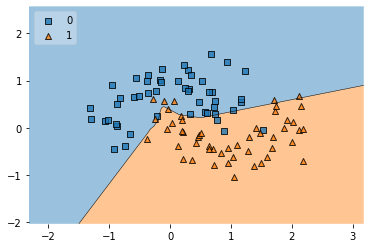

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [18]:
(np.random.randn(10,10)*0.01).min()

-0.022632777732382398

In [19]:
(np.random.randn(10,10)*0.01).max()

0.023738813456732073